### Data Fields

datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius
humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
sns.set_style("white")

In [42]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas\\bike'

In [43]:
cd bike

[WinError 2] The system cannot find the file specified: 'bike'
C:\Users\Kriszta\desktop\datas\bike


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 
sns.set_style("white")

In [85]:
df=pd.read_csv('train.csv',index_col=0, parse_dates=True )
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [86]:
# Extract features like hour, month etc. from the datetime column.

pd.date_range('1/1/2011', periods=30, freq='4h')

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 04:00:00',
               '2011-01-01 08:00:00', '2011-01-01 12:00:00',
               '2011-01-01 16:00:00', '2011-01-01 20:00:00',
               '2011-01-02 00:00:00', '2011-01-02 04:00:00',
               '2011-01-02 08:00:00', '2011-01-02 12:00:00',
               '2011-01-02 16:00:00', '2011-01-02 20:00:00',
               '2011-01-03 00:00:00', '2011-01-03 04:00:00',
               '2011-01-03 08:00:00', '2011-01-03 12:00:00',
               '2011-01-03 16:00:00', '2011-01-03 20:00:00',
               '2011-01-04 00:00:00', '2011-01-04 04:00:00',
               '2011-01-04 08:00:00', '2011-01-04 12:00:00',
               '2011-01-04 16:00:00', '2011-01-04 20:00:00',
               '2011-01-05 00:00:00', '2011-01-05 04:00:00',
               '2011-01-05 08:00:00', '2011-01-05 12:00:00',
               '2011-01-05 16:00:00', '2011-01-05 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [87]:
pd.date_range(start=1/12/2011, periods= 31, freq='24h')

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10', '1970-01-11', '1970-01-12',
               '1970-01-13', '1970-01-14', '1970-01-15', '1970-01-16',
               '1970-01-17', '1970-01-18', '1970-01-19', '1970-01-20',
               '1970-01-21', '1970-01-22', '1970-01-23', '1970-01-24',
               '1970-01-25', '1970-01-26', '1970-01-27', '1970-01-28',
               '1970-01-29', '1970-01-30', '1970-01-31'],
              dtype='datetime64[ns]', freq='24H')

In [88]:
df.reset_index(inplace = True)

df['year']= pd.to_datetime(df['datetime']).dt.year

In [89]:
df['month']= pd.to_datetime(df['datetime']).dt.month

In [90]:
df['day']= pd.to_datetime(df['datetime']).dt.day

In [91]:
df['hour']= pd.to_datetime(df['datetime']).dt.hour

In [92]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [55]:
# Group by a time feature and observe grouped means ( Rolling Windows)

In [73]:
df=pd.read_csv('train.csv',index_col=0, parse_dates=True )
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


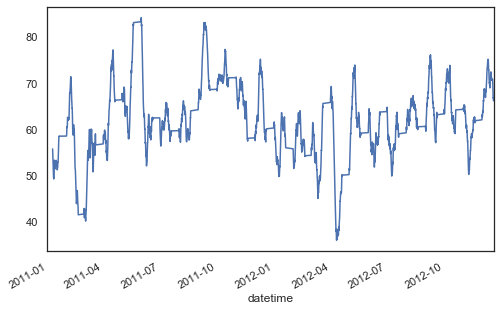

In [76]:
df['humidity'].rolling(200).mean().plot(figsize=(8,5))

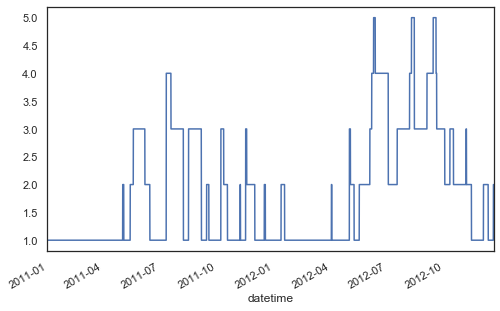

In [78]:
df['count'].rolling(200, min_periods=30).min().plot(figsize=(8,5))